## Analyse the results



In [1]:
# load the relevant modules for the analysis

from pl_temp_fit import Exp_data_utils

import numpy as np
import os
import matplotlib.pyplot as plt
import datetime
import os
import json
import uuid
import numpy as np
from pl_temp_fit import config_utils
from pl_temp_fit import covariance_utils, generate_data_utils, fit_EL_utils
import emcee
import pandas as pd

os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 
# access the right directory
#os.chdir('C:\\Users\\ma11115\\OneDrive - Imperial College London\\pl_temp_fit')

In [2]:
import glob
from pl_temp_fit import Emcee_utils
json_files = glob.glob('fit_experimental_emcee_PL/fit_data_base/*.json')
list_model_config=[]
for id,json_file in enumerate(json_files):
    try:
        model_config, model_config_save = config_utils.load_model_config(json_file.split('/')[-1].replace('.json',''), database_folder = "fit_experimental_emcee_PL/fit_data_base")
    except Exception as e:
        print(e)
        continue
    if os.path.exists(model_config_save['save_folder']+'/sampler.h5'):      
        filename = model_config_save['save_folder'] + "/sampler.h5"
        try: 
            reader = Emcee_utils.hDFBackend_2(filename, name="multi_core")
            distribution = reader.get_chain(flat=True)
        except:
            reader = Emcee_utils.hDFBackend_2(filename, name="single_core")
            distribution = reader.get_chain(flat=True)
        true_parameters=list(np.mean(distribution,axis=0))
        model_config_save['mean'] = [f"{x:.3f}" for x in true_parameters]          
        model_config_save['num_iteration'] = reader.iteration  
        log_prob = reader.get_log_prob( flat=True)  
        model_config_save['max_log_prob'] = np.max(log_prob)
        list_model_config.append(model_config_save)

df_all = pd.DataFrame(list_model_config)
df_all.sort_values(by='date',ascending=False,inplace=True)   
df_all

,Temp_std_err,hws_std_err,relative_intensity_std_error_PL,relative_intensity_std_error_EL,sigma,save_folder,csv_name_PL,csv_name_EL,date,test_id,...,params_to_fit_init,min_bounds,max_bounds,num_iteration_max_likelihood,coeff_spread,nsteps,num_coords,mean,num_iteration,max_log_prob
2,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_06_05...,experiemental_data/2023-12-12-Lowtemp-PL/ITIC_...,,2024_06_05,dfd36af3-99f5-4faf-9db7-b95274553db8,...,"{'EX': {'E': 1.7, 'sigma': 0.001, 'Li': 0.078,...","{'EX': {'E': 1.6, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.8, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.675, 0.026, 0.100, 0.074, 0.145]",1000,-60.924550
5,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_06_05...,experiemental_data/2023-12-12-Lowtemp-PL/IEICO...,,2024_06_05,d1a554cd-39d3-4e7e-8efc-cdf65c14cba3,...,"{'EX': {'E': 1.4, 'sigma': 0.001, 'Li': 0.078,...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.404, 0.002, 0.075, 0.108, 0.157]",10,-871.723462
7,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_06_05...,experiemental_data/2023-12-12-Lowtemp-PL/ITIC_...,,2024_06_05,29cc0f60-d6a8-4404-a612-b2b882501d1b,...,"{'EX': {'E': 1.7, 'sigma': 0.001, 'Li': 0.078,...","{'EX': {'E': 1.6, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.8, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.681, 0.010, 0.110, 0.121, 0.142]",1210,-79.139058
9,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_06_05...,experiemental_data/2023-12-12-Lowtemp-PL/ITIC_...,,2024_06_05,7cdf0382-5383-4de1-965a-ea3e7bec6a75,...,"{'EX': {'E': 1.7, 'sigma': 0.001, 'Li': 0.078,...","{'EX': {'E': 1.6, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.8, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.703, 0.012, 0.098, 0.155, 0.171]",793,-308.262608
1,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_06_04...,experiemental_data/2023-12-12-Lowtemp-PL/IEICO...,,2024_06_04,7ec32554-4e8e-4830-a15d-203c341d6fd2,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'Li': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.398, 0.017, 0.078, 0.048, 0.130]",10020,-328.711434
3,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_03_14...,experiemental_data/2023-12-12-Lowtemp-PL/IEICO...,,2024_03_14,585f3f01-a5cd-4f4e-ac4c-b1c6b5dee47b,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'Li': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'Li': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'Li': 0.2, 'L...",5,0.5,10000,32,"[1.375, 0.001, 0.071, 0.111, 0.160]",5,-1446.023664
0,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_PL/fit_data//2024_03_12...,experiemental_data/2023-12-12-Lowtemp-PL/IEICO...,,2024_03_12,7db5f65e-55ab-4647-b543-24dc848335f2,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'LI': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'LI': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'LI': 0.2, 'L...",5,0.5,10000,32,"[1.443, 0.015, 0.090, 0.118, 0.153]",200,-1663.156806
4,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_EL/2024_03_12/IEICO/387...,experiemental_data/2023-12-12-Lowtemp-PL/IEICO...,,2024_03_12,387d79f3-af40-47f2-99f4-4f9c2a5622ec,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'LI': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'LI': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'LI': 0.2, 'L...",5,0.5,10000,32,"[1.374, 0.001, 0.075, 0.110, 0.157]",5,-1999.330156
6,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_EL/2024_03_12/IEICO/aa7...,experiemental_data/2023-12-12-Lowtemp-PL/IEICO...,,2024_03_12,aa76848d-7cb5-4f8e-8652-50330f2965be,...,"{'EX': {'E': 1.37, 'sigma': 0.001, 'LI': 0.078...","{'EX': {'E': 1.3, 'sigma': 0.001, 'LI': 0.03, ...","{'EX': {'E': 1.5, 'sigma': 0.03, 'LI': 0.2, 'L...",5,0.5,10000,32,"[1.455, 0.017, 0.109, 0.112, 0.145]",601,-1690.548519
8,10,0.005,0.05,0.001,0.001,fit_experimental_emcee_PL/fit_data/

In [6]:
index_analyse = 1
test_id = df_all['test_id'].loc[index_analyse]
model_config, model_config_save = config_utils.load_model_config(test_id, database_folder = "fit_experimental_emcee_PL/fit_data_base/")
filename = model_config_save['save_folder'] + "/sampler.h5"
reader = emcee.backends.HDFBackend(filename, name="multi_core")
distribution = reader.get_chain(discard=0, flat=True)  

number of iterations 10020
-328.71143406854605


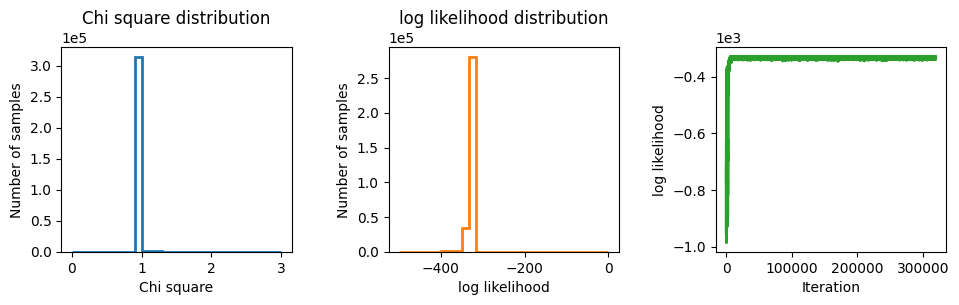

In [7]:
from pl_temp_fit import plot_utils
import importlib
importlib.reload(plot_utils)
plot_utils.plot_fit_statistics(reader,range_log_prior = (-500,0),discard=30,range_chi_square = (0,3),filter_log_likelihood=True)

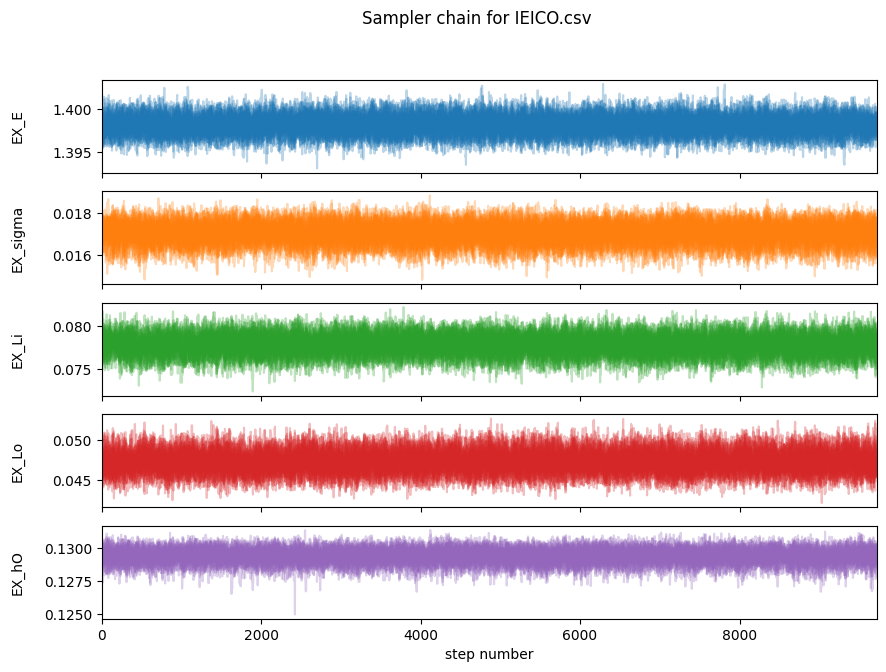

In [8]:
plot_utils.plot_chains(reader,model_config_save,discard=300)

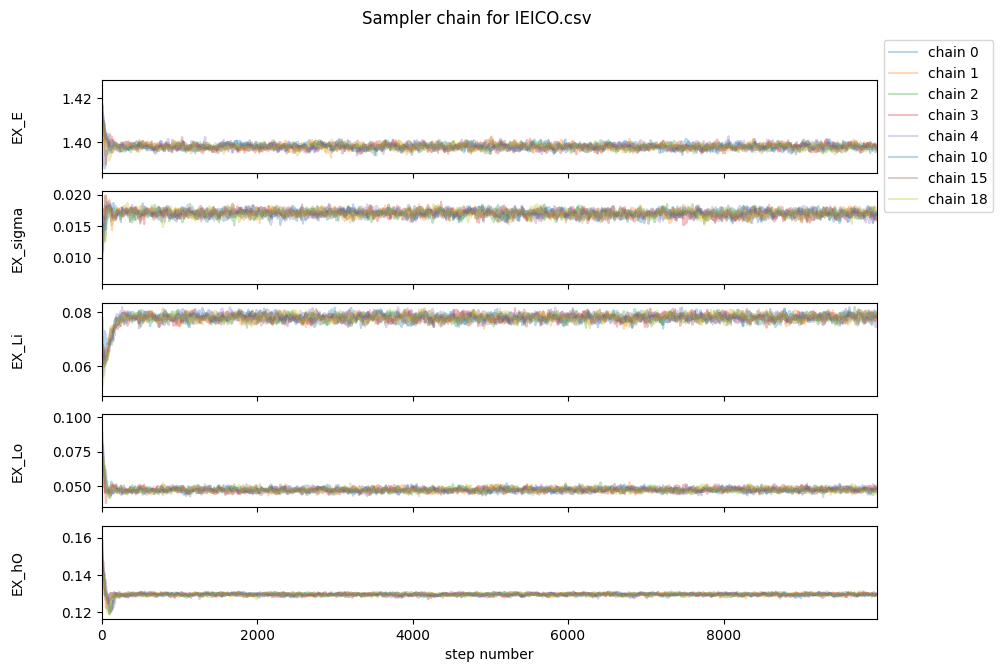

In [9]:
plot_utils.plot_diff_chains(reader,model_config_save,discard=50,chains_list = [0,1,2,3,4,10,15,18])

(1.0, 1.6)

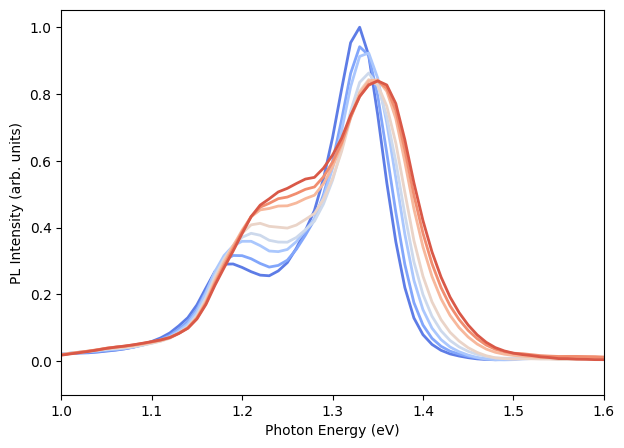

In [22]:
def plot_PL_data(
     truemodel_pl, temperature_list, hws,title="Experimental Data"
):
    fig,ax= plt.subplots(1,1, figsize=(7, 5))

    data_true_plot = truemodel_pl.reshape(len(hws), -1)/max(truemodel_pl.reshape(-1, 1))
    import seaborn as sns
    color_list = sns.color_palette('coolwarm', len(temperature_list))
    for i in range(len(temperature_list)):

        ax.plot(
            hws,
            data_true_plot[:, i],
            label="" + str(temperature_list[i]) + " K",
            #linestyle="--",
            color=color_list[i],
            linewidth=2,
        )


    ax.set_xlabel("Photon Energy (eV)")
    ax.set_ylabel("PL Intensity (arb. units)")

    return fig,ax
csv_name = model_config_save["csv_name_PL"]
Exp_data, temperature_list, hws = Exp_data_utils.read_data(csv_name)
fig,ax = plot_PL_data(Exp_data, temperature_list, hws,title="Experimental Data")
ax.set_xlim(1, 1.6)

shape of mean value plot is (86, 8)


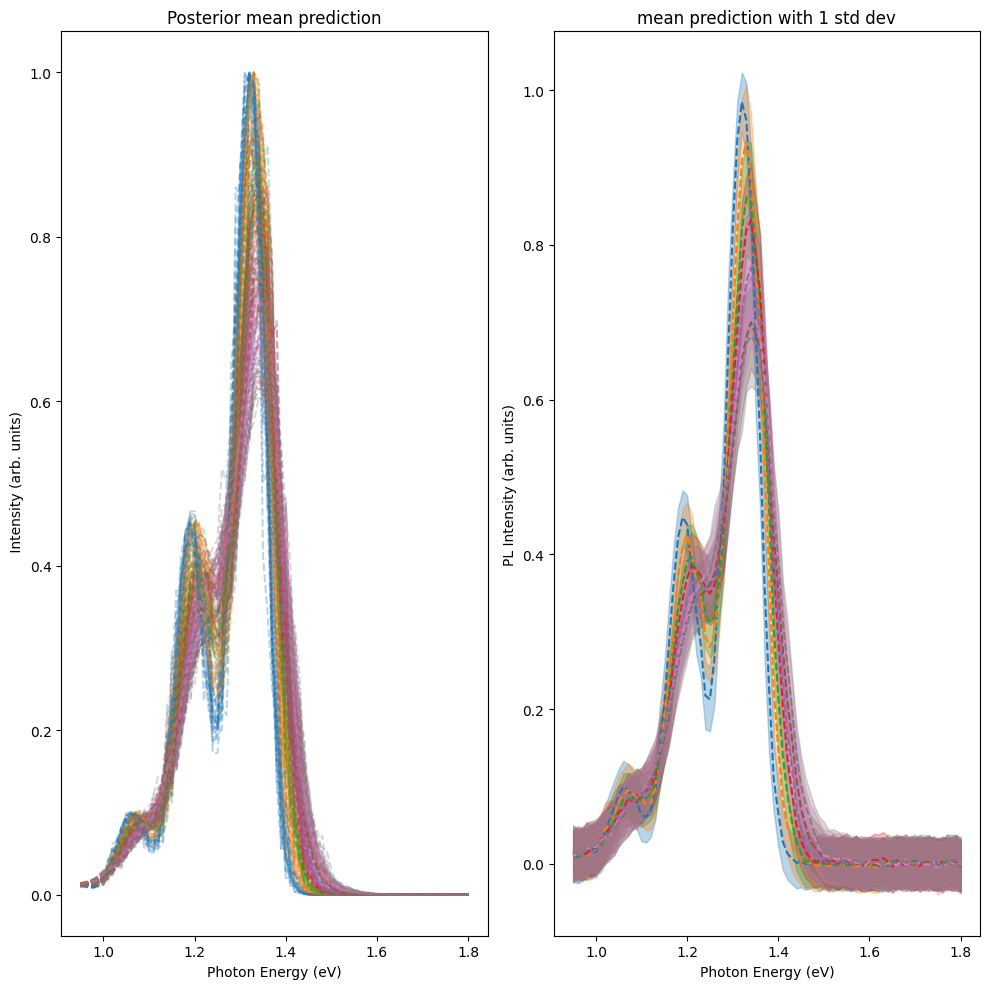

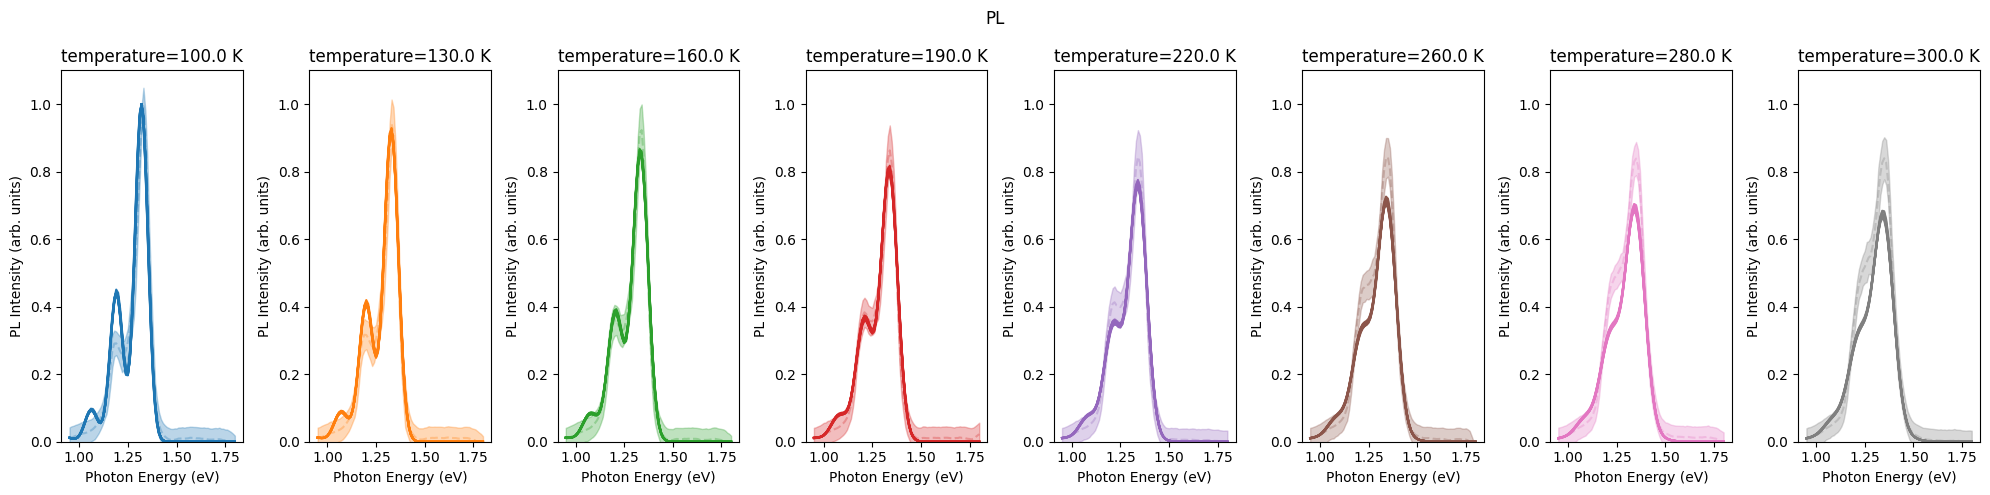

In [10]:
plot_utils.plot_fit_to_experimental_data(model_config_save,model_config,reader,discard=60,filter_log_likelihood=True)

(<Figure size 1000x700 with 5 Axes>,
 array([<Axes: ylabel='EX_E'>, <Axes: ylabel='EX_sigma'>,
        <Axes: ylabel='EX_Li'>, <Axes: ylabel='EX_Lo'>,
        <Axes: ylabel='EX_hO'>], dtype=object))

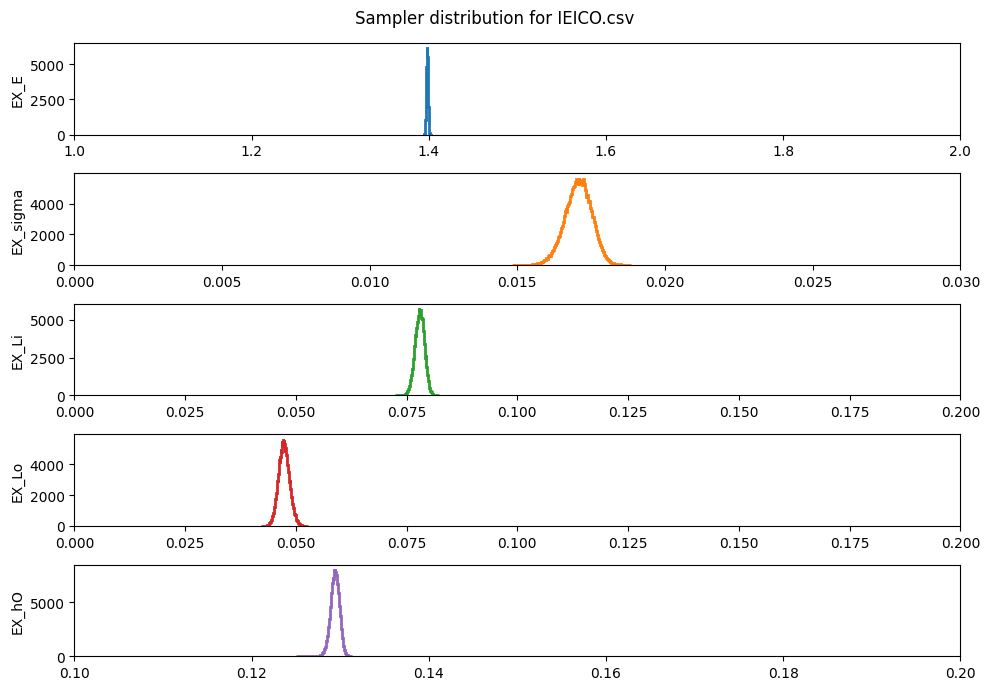

In [11]:
importlib.reload(plot_utils)
plot_utils.plot_distribution(reader,model_config_save,discard=400,filter_log_likelihood=True)

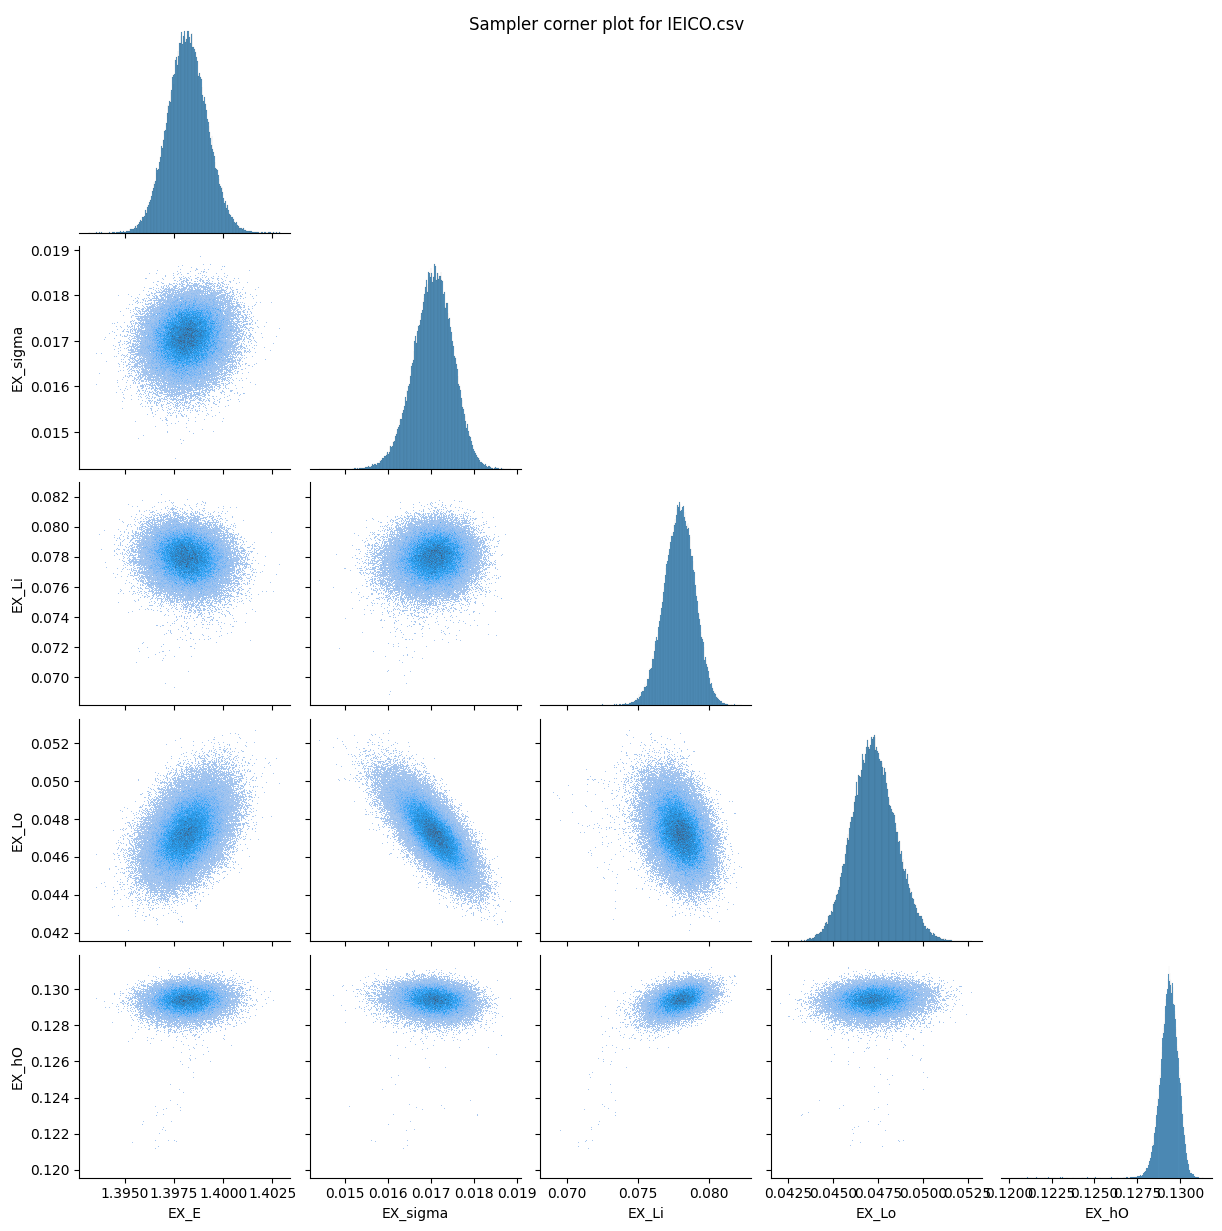

In [12]:
plot_utils.plot_corner(reader,model_config_save,discard=200,filter_log_likelihood=True)

number of iterations 681


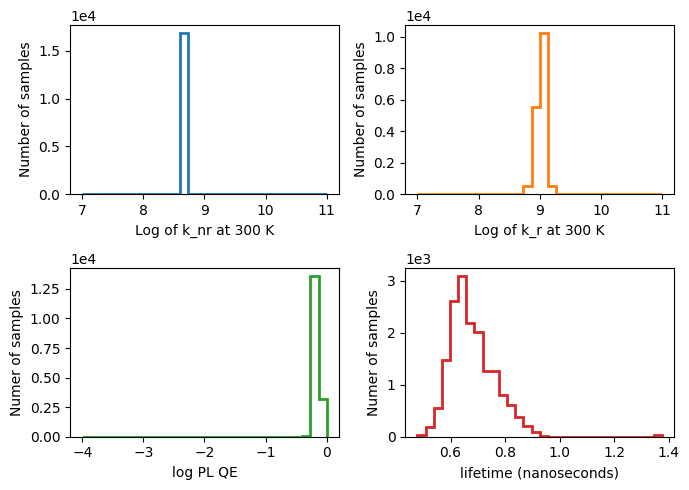

In [210]:
plot_utils.plot_lifetime(reader, discard=100,filter_log_likelihood=True)

number of iterations 1210
-79.13905769350092
number of iterations 793
-308.2626075644732


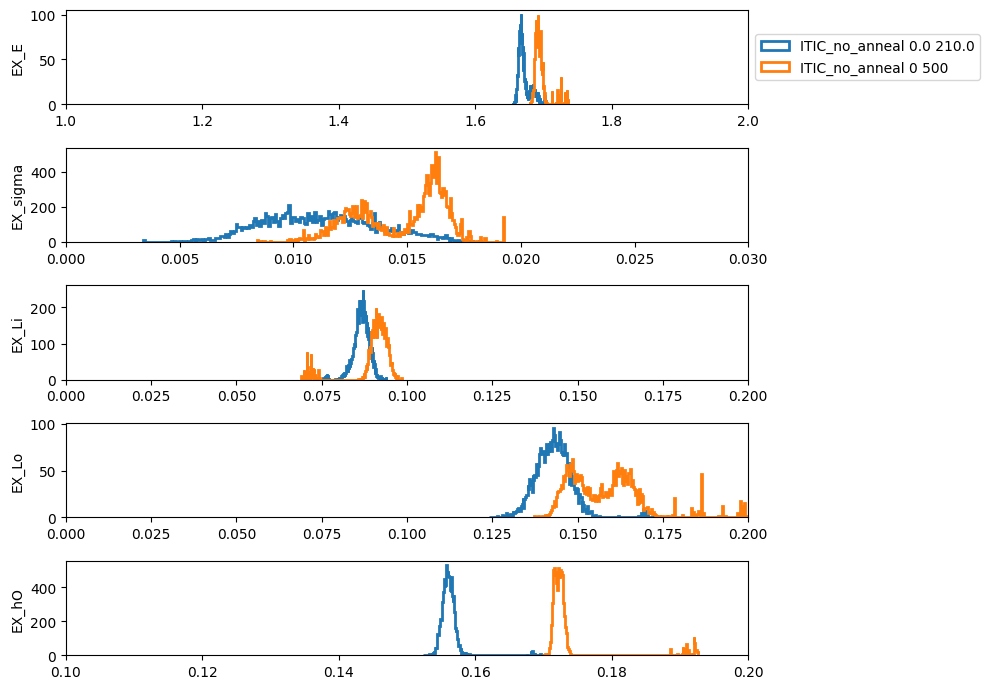

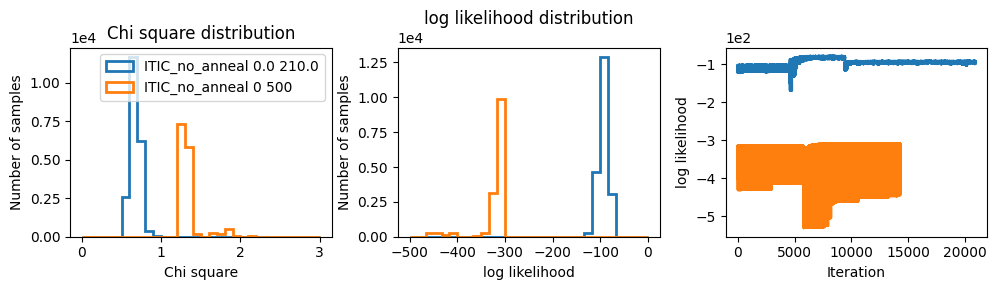

In [217]:
import importlib

importlib.reload(plot_utils)
index_analyse_list = [7, 9]
fig, axes = plt.subplots(5, figsize=(10, 7))
for i, index_analyse in enumerate(index_analyse_list):
    test_id = df_all["test_id"].loc[index_analyse]
    label = (
        df_all["csv_name_PL"]
        .loc[index_analyse]
        .split("/")[-1]
        .replace(".csv", "")
        .replace("_mod_split", " ")
        .replace("_split", " ")
    )
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder="fit_experimental_emcee_PL/fit_data_base/"
    )
    filename = model_config_save["save_folder"] + "/sampler.h5"
    reader = emcee.backends.HDFBackend(filename, name="multi_core")
    fig, ax = plot_utils.plot_distribution_multi(
        reader,
        model_config_save,
        discard=300,
        filter_log_likelihood=True,
        fig=fig,
        axes=axes,
        color=f"C{i}",
        legend_label=label,
    )
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
for i, index_analyse in enumerate(index_analyse_list):
    test_id = df_all["test_id"].loc[index_analyse]
    label = (
        df_all["csv_name_PL"]
        .loc[index_analyse]
        .split("/")[-1]
        .replace(".csv", "")
        .replace("_mod_split", " ")
        .replace("_split", " ")
    )
    model_config, model_config_save = config_utils.load_model_config(
        test_id, database_folder="fit_experimental_emcee_PL/fit_data_base/"
    )
    filename = model_config_save["save_folder"] + "/sampler.h5"
    reader = emcee.backends.HDFBackend(filename, name="multi_core")
    fig, ax = plot_utils.plot_fit_statistics_multi(
        reader,
        range_log_prior=(-500, 0),
        discard=300,
        range_chi_square=(0, 3),
        filter_log_likelihood=True,
        fig=fig,
        ax=ax,
        legend_label=label,
        color=f"C{i}",
    )